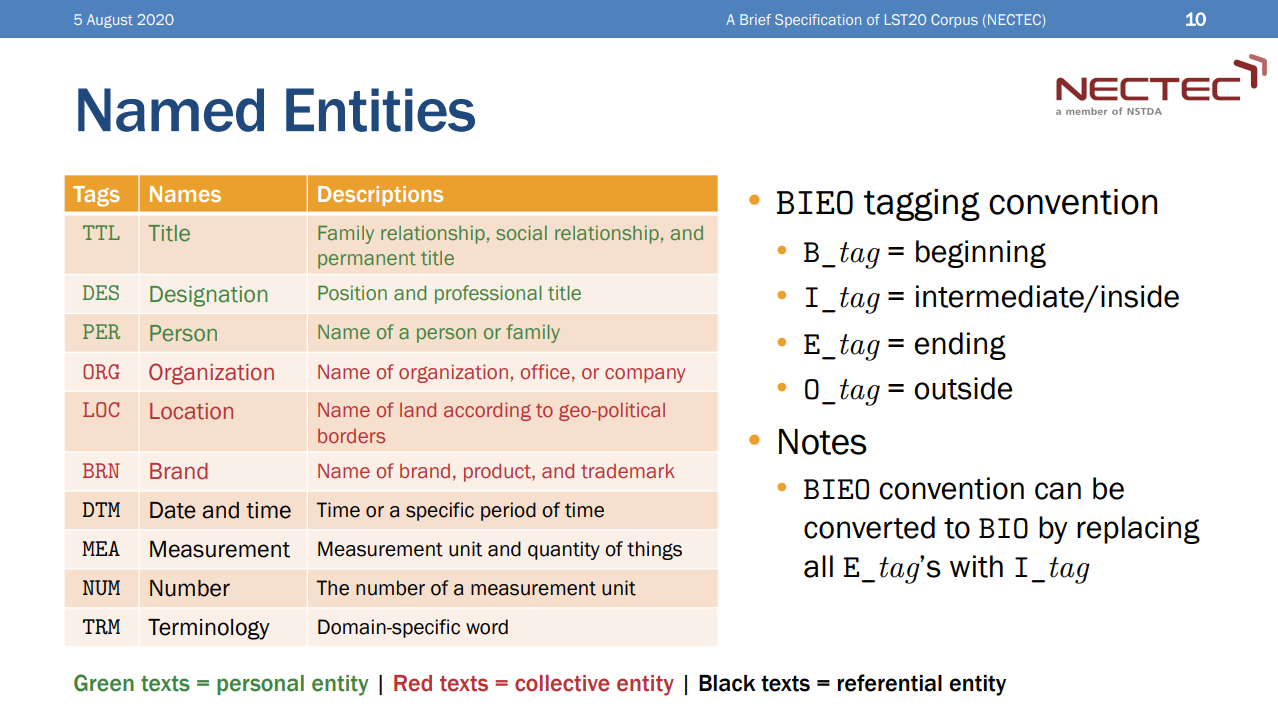

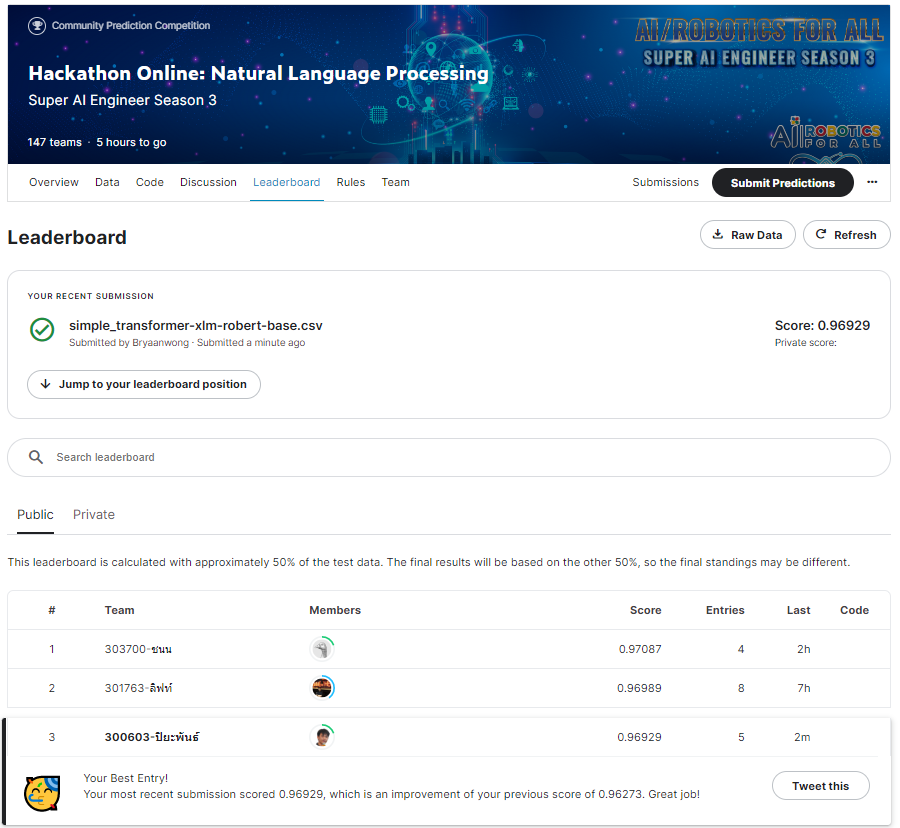

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q simpletransformers
!pip install pythainlp python-crfsuite fairseq seqeval

In [ ]:
!cp /content/drive/MyDrive/colab/kaggle.json /content/kaggle.json
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c ss3-hackathon-online-natural-language-processing #download competition dataset

In [ ]:
import logging
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs
import torch

from datasets import load_dataset

from pythainlp.tokenize import sent_tokenize
from pythainlp.tokenize import clause_tokenize

In [ ]:
# Simple Transformer https://simpletransformers.ai/docs/ner-minimal-start/
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
#Change File location

!cp /content/drive/MyDrive/colab/hack4/AIFORTHAI-LST20Corpus.tar.gz /content/AIFORTHAI-LST20Corpus.tar.gz
!cp /content/drive/MyDrive/colab/hack4/ss3-hackathon-online-natural-language-processing.zip /content/ss3-hackathon-online-natural-language-processing.zip 

In [ ]:
!unzip /content/ss3-hackathon-online-natural-language-processing.zip
!tar -xvf "/content/AIFORTHAI-LST20Corpus.tar.gz"

#Download dataset

In [ ]:
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_df.head()

id       fname                                             tokens  \
0  0  T00126.txt  [สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...   
1  1  T00126.txt          [1, _, กันยายน, _, 2550, _, 12:21, _, น.]   
2  2  T00126.txt  [นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...   
3  3  T00126.txt  [ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...   
4  4  T00126.txt  [พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...   

                                            pos_tags  \
0              [0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]   
1                       [8, 2, 0, 2, 8, 2, 8, 2, 10]   
2  [0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...   
3  [1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...   
4                           [3, 1, 0, 1, 1, 3, 1, 1]   

                                            ner_tags  \
0               [8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]   
1                  [3, 13, 13, 13, 23, 0, 3, 13, 23]   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...   
3  [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4                           [0, 0, 7, 0, 0, 0, 0, 0]   

                                         clause_tags  
0               [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]  
1                        [1, 2, 2, 2, 2, 2, 2, 2, 3]  
2  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ...  
3  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...  
4                           [1, 2, 2, 2, 3, 1, 2, 3]

In [ ]:
_NER_TAGS = [
       "O",
        "B_BRN",        "B_DES",        "B_DTM",        "B_LOC",        "B_MEA",        "B_NUM",        "B_ORG",        "B_PER",        "B_TRM",        "B_TTL",
       "I_BRN",        "I_DES",        "I_DTM",        "I_LOC",        "I_MEA",        "I_NUM",        "I_ORG",        "I_PER",        "I_TRM",        "I_TTL",
        "E_BRN",        "E_DES",        "E_DTM",        "E_LOC",        "E_MEA",        "E_NUM",        "E_ORG",        "E_PER",        "E_TRM",        "E_TTL"]

In [ ]:
#Check word inside list
def data_inside(data_list):
  x = 0
  for i in range(len(data_list)):
    a = len(data_list[i])
    x = x+a 
  return x

#Replace blank with "_"
def blank_space(x):
  if x == '':
    x = '_'
  return x

#Extract Data form Data Loader 
def convert_data_to_df(df):
  data_df = pd.DataFrame()
  sentence_id = []
  words = []
  labels = []

  for sentence in range(len(df)):
    for token in range(len(df['tokens'][sentence])):
      sentence_id.append(sentence)
      words.append(df['tokens'][sentence][token])
      labels.append(_NER_TAGS[df['ner_tags'][sentence][token]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )

In [ ]:
train_data = convert_data_to_df(train_df)
train_data.head()

sentence_id     words labels
0            0  สุรยุทธ์  B_PER
1            0       ยัน      O
2            0    ปฏิเสธ      O
3            0     ลงนาม      O
4            0         _      O

In [ ]:
eval_data = convert_data_to_df(validation_df )

In [ ]:
test_data = convert_data_to_df(test_df)

In [ ]:
# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 14 
ner_args.eval_batch_size = 14
ner_args.use_multiprocessing = True 
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 4
ner_args.max_seq_length = 80

model = NERModel(
     "auto", "xlm-roberta-base", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-st

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
# Train the model
model.train_model(train_data, eval_data=eval_data)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/4523 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_NUM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171:

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/4523 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/4523 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/4523 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/402 [00:00<?, ?it/s]

(18092,
 defaultdict(list,
             {'global_step': [2000,
               4000,
               4523,
               6000,
               8000,
               9046,
               10000,
               12000,
               13569,
               14000,
               16000,
               18000,
               18092],
              'train_loss': [0.16099391877651215,
               0.1634642332792282,
               0.20530244708061218,
               0.08739824593067169,
               0.0718623623251915,
               0.27337077260017395,
               0.06046746298670769,
               0.10373222082853317,
               0.04520610719919205,
               0.039193905889987946,
               0.10774483531713486,
               0.0436495766043663,
               0.013227998279035091],
              'eval_loss': [0.16622858170410665,
               0.15080052679311948,
               0.14665029531076032,
               0.13928734276105478,
               0.14208990153022555,
  

In [ ]:
!cp -r /content/outputs/best_model /content/drive/MyDrive/colab/hack4/best_model

In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(eval_data)

#Extremely pre-processing test data

In [ ]:
#Read test file
texts_test_raw = []
f = open('/content/ne_test.txt', "r")
file_data = f.readlines()
for line in file_data:
  line = line.strip().replace(u'\xa0', u'')
  texts_test_raw.append(line)

In [ ]:
print(texts_test_raw)

['นาง', 'สุดารัตน์', '', 'เกยุราพันธ์', '', 'รมว.', 'สาธารณสุข', '', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '', '100', '%', '', 'ว่า', '', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '', '7', '', 'ก.พ.', 'นี้', '', 'ตั้งแต่', '', '16.00', 'น.', 'เป็นต้นไป', '', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '', 'ชินวัตร', 'รัฐมนตรี', '', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '', '16.30', 'น.', '', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '', 'ไก่', 'ทอด', '', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '', 'สุนทรเวช', '', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '', 'และ', 'ม.ล.', 'ศิริเฉลิม', '', 'สวัสดิวัฒน์', '', 'หรือ', 'หมึกแดง', '', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร', 'เสร็จ', 'จะ', 'ร่วม', 'ร

In [ ]:
#Check word length
len(texts_test_raw)

69562

In [ ]:
#delete last word
texts_test_raw = texts_test_raw[:-1]

In [ ]:
print(texts_test_raw)

['นาง', 'สุดารัตน์', '', 'เกยุราพันธ์', '', 'รมว.', 'สาธารณสุข', '', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '', '100', '%', '', 'ว่า', '', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '', '7', '', 'ก.พ.', 'นี้', '', 'ตั้งแต่', '', '16.00', 'น.', 'เป็นต้นไป', '', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '', 'ชินวัตร', 'รัฐมนตรี', '', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '', '16.30', 'น.', '', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '', 'ไก่', 'ทอด', '', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '', 'สุนทรเวช', '', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '', 'และ', 'ม.ล.', 'ศิริเฉลิม', '', 'สวัสดิวัฒน์', '', 'หรือ', 'หมึกแดง', '', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร', 'เสร็จ', 'จะ', 'ร่วม', 'ร

In [ ]:
#Loop replace blank to "_"
for i in range(len(texts_test_raw)):
  texts_test_raw[i] = blank_space(texts_test_raw[i])

In [ ]:
#Check result
print(len(texts_test_raw))
print(texts_test_raw)

69561
['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '_', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '_', 'สุนทรเวช', '_', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '_', 'และ', 'ม.ล.', 'ศิริเฉลิม', '_', 'สวัสดิวัฒน์', '_', 'หรือ', 'หมึกแดง', '_', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '_', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', '

In [ ]:
# Sentence Cut by LST20 dataset
my_token = clause_tokenize(texts_test_raw)
print(my_token)

/usr/local/lib/python3.7/dist-packages/pythainlp/tokenize/crfcls.py:63: UserWarning: 
    LST20 corpus are free for research and open source only.

    If you want to use in Commercial use, please contract NECTEC.

    https://www.facebook.com/dancearmy/posts/10157641945708284
    
  """)
/usr/local/lib/python3.7/dist-packages/pythainlp/tag/perceptron.py:47: UserWarning: 
    LST20 corpus are free for research and open source only.

    If you want to use in Commercial use, please contract NECTEC.

    https://www.facebook.com/dancearmy/posts/10157641945708284
    
  """


[['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง'], ['และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '_', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '_', 'สุนทรเวช', '_', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '_', 'และ', 'ม.ล.', 'ศิริเฉลิม', '_', 'สวัสดิวัฒน์', '_', 'หรือ', 'หมึกแดง', '_', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '_', 'ภาย'], ['หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อ

In [ ]:
print(my_token[0])

['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง']


In [ ]:
#Check how many sentence
len(my_token)

3648

In [ ]:
my_token

[['นาง',
  'สุดารัตน์',
  '_',
  'เกยุราพันธ์',
  '_',
  'รมว.',
  'สาธารณสุข',
  '_',
  'แถลง',
  'ถึง',
  'การ',
  'จัด',
  'งาน',
  'มหกรรม',
  'กิน',
  'ไก่',
  'ไทย',
  'ปลอด',
  'ภัย',
  '_',
  '100',
  '%',
  '_',
  'ว่า',
  '_',
  'รัฐบาล',
  'ร่วม',
  'กับ',
  'กทม.',
  'จัด',
  'งาน',
  'ดัง',
  'กล่าว',
  'ขึ้น',
  'ที่',
  'ท้องสนามหลวง',
  'ใน',
  'วัน',
  'เสาร์',
  'ที่',
  '_',
  '7',
  '_',
  'ก.พ.',
  'นี้',
  '_',
  'ตั้งแต่',
  '_',
  '16.00',
  'น.',
  'เป็นต้นไป',
  '_',
  'ส่วน',
  'พ.ต.ท.',
  'ทักษิณ',
  '_',
  'ชินวัตร',
  'รัฐมนตรี',
  '_',
  'จะ',
  'เดินทาง',
  'มา',
  'ถึง',
  'ที่',
  'งาน',
  'ใน',
  'เวลา',
  '_',
  '16.30',
  'น.',
  '_',
  'เพื่อ',
  'เยี่ยมชม',
  'นิทรรศการ',
  '_',
  'และ',
  'ประกอบ',
  'อาหาร',
  'เมนู',
  '_',
  'กระเพรา',
  'ไก่',
  'ไข่ดาว',
  'สุก',
  '_',
  'ไก่',
  'ทอด',
  '_',
  'ด้วย',
  'ตัว',
  'เอง'],
 ['และ',
  'แจกจ่าย',
  'ให้',
  'กับ',
  'ประชาชน',
  '_',
  'โดย',
  'จะ',
  'มี',
  'นาย',
  'สมัคร',
  '_',
  'สุนทร

In [ ]:
#Join all word in sentence seperate by space
sent_join = ' '.join(my_token[0])
type(sent_join)

str

In [ ]:
data_inside(my_token)

69561

In [ ]:
# Append all sentence to one list
my_token_list = []
for i in range(len(my_token)):
# for i in range(4):
  sent_join = ' '.join(my_token[i])
  print(sent_join)
  my_token_list.append(sent_join) 

นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _ 100 % _ ว่า _ รัฐบาล ร่วม กับ กทม. จัด งาน ดัง กล่าว ขึ้น ที่ ท้องสนามหลวง ใน วัน เสาร์ ที่ _ 7 _ ก.พ. นี้ _ ตั้งแต่ _ 16.00 น. เป็นต้นไป _ ส่วน พ.ต.ท. ทักษิณ _ ชินวัตร รัฐมนตรี _ จะ เดินทาง มา ถึง ที่ งาน ใน เวลา _ 16.30 น. _ เพื่อ เยี่ยมชม นิทรรศการ _ และ ประกอบ อาหาร เมนู _ กระเพรา ไก่ ไข่ดาว สุก _ ไก่ ทอด _ ด้วย ตัว เอง
และ แจกจ่าย ให้ กับ ประชาชน _ โดย จะ มี นาย สมัคร _ สุนทรเวช _ ผู้ ว่า ฯ กทม. _ และ ม.ล. ศิริเฉลิม _ สวัสดิวัฒน์ _ หรือ หมึกแดง _ ร่วม ปรุง อาหาร ด้วย _ ภาย
หลัง ที่ นายก ฯ ปรุง อาหาร เสร็จ จะ ร่วม รับประทาน อาหาร กับ ประชาชน _ และ เดิน ทักทาย
เพื่อ ให้ กำลังใจ กับ ผู้ ประกอบ การ ตาม บูท ต่างๆ _ จาก นั้น ก็ จะ กล่าว ปราศรัย ด้วย _ ส่วน นิทรรศการ และ การ แจก ไก่ และ ไข่ สุก จะ เริ่ม ตั้งแต่ เวลา _ 16.00 - 18.00 _ นาง สุดารัตน์ _ กล่าว ต่อ
ว่า _ วัตถุประสงค์ ของ งาน
เพื่อ สร้าง ความ เชื่อมั่น
และ ความ เข้าใจ
ให้ กับ ประชาชน ว่า ไก่ และ ไข่ สุก สามารถ รับประทาน ได้ _ และ ค

In [ ]:
#Check how many sentence compare upper (my_token)
print(len(my_token))
print(len(my_token_list))
print(data_inside(my_token_list))

3648
3648
318286


In [ ]:
#Display data before prediction
print(my_token_list)

['นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _ 100 % _ ว่า _ รัฐบาล ร่วม กับ กทม. จัด งาน ดัง กล่าว ขึ้น ที่ ท้องสนามหลวง ใน วัน เสาร์ ที่ _ 7 _ ก.พ. นี้ _ ตั้งแต่ _ 16.00 น. เป็นต้นไป _ ส่วน พ.ต.ท. ทักษิณ _ ชินวัตร รัฐมนตรี _ จะ เดินทาง มา ถึง ที่ งาน ใน เวลา _ 16.30 น. _ เพื่อ เยี่ยมชม นิทรรศการ _ และ ประกอบ อาหาร เมนู _ กระเพรา ไก่ ไข่ดาว สุก _ ไก่ ทอด _ ด้วย ตัว เอง', 'และ แจกจ่าย ให้ กับ ประชาชน _ โดย จะ มี นาย สมัคร _ สุนทรเวช _ ผู้ ว่า ฯ กทม. _ และ ม.ล. ศิริเฉลิม _ สวัสดิวัฒน์ _ หรือ หมึกแดง _ ร่วม ปรุง อาหาร ด้วย _ ภาย', 'หลัง ที่ นายก ฯ ปรุง อาหาร เสร็จ จะ ร่วม รับประทาน อาหาร กับ ประชาชน _ และ เดิน ทักทาย', 'เพื่อ ให้ กำลังใจ กับ ผู้ ประกอบ การ ตาม บูท ต่างๆ _ จาก นั้น ก็ จะ กล่าว ปราศรัย ด้วย _ ส่วน นิทรรศการ และ การ แจก ไก่ และ ไข่ สุก จะ เริ่ม ตั้งแต่ เวลา _ 16.00 - 18.00 _ นาง สุดารัตน์ _ กล่าว ต่อ', 'ว่า _ วัตถุประสงค์ ของ งาน', 'เพื่อ สร้าง ความ เชื่อมั่น', 'และ ความ เข้าใจ', 'ให้ กับ ประชาชน ว่า ไก่ และ ไข่ สุก สามาร

#Prediction Model

In [ ]:
# Test Model
ner_args = NERArgs()
ner_args.train_batch_size = 16 
ner_args.eval_batch_size = 16
ner_args.use_multiprocessing = True 
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 3
ner_args.max_seq_length = 512 # Fixed Requirement ##############################

model = NERModel(
     "auto", "/content/outputs/best_model", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS  # your latest model
)

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(my_token, False)

  0%|          | 0/4 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/228 [00:00<?, ?it/s]

In [ ]:
#Check result sentence
len(predictions)

3648

In [ ]:
#Check result data and type
predictions[0][0:6]

[{'นาง': 'B_TTL'},
 {'สุดารัตน์': 'B_PER'},
 {'_': 'I_PER'},
 {'เกยุราพันธ์': 'E_PER'},
 {'_': 'O'},
 {'รมว.': 'B_DES'}]

In [ ]:
#check word prediction
data_inside(predictions)

69561

69563 is more that 69561 need explore

In [ ]:
# X is word before prediction
# Y is word after prediction
x = []
for i in range(len(my_token)):
 a = len(my_token[i])
 x.append(a)

y = []
for i in range(len(predictions)):
 a = len(predictions[i])
 y.append(a)

In [ ]:
s1 = pd.DataFrame(x)
s2 = pd.DataFrame(y)
comp_df = pd.concat([s1, s2], axis=1)
comp_df.columns  = ['X','Y']
comp_df['dif'] = comp_df['Y'] - comp_df['X']
#Display dif more than 0
comp_df.loc[comp_df['dif']>0]

Empty DataFrame
Columns: [X, Y, dif]
Index: []

In [ ]:
print(my_token[1930])
print(predictions[1930])

In [ ]:
print(my_token[1931])
print(predictions[1931])

In [ ]:
print(predictions[1930][4])
print(predictions[1931][4])

In [ ]:
#Delate manual
# Warning Please do not run
del predictions[1930][4]
del predictions[1931][4]

In [ ]:
#check word prediction
data_inside(predictions)

In [ ]:
#Extract data value from dict list
final_test_df = []
for i in range(len(predictions)):
# for i in range(3):
  for j in range(len(predictions[i])):
    data = predictions[i][j]
    value = data.values()
    final_test_df += value
len(final_test_df)

69561

In [ ]:
print(final_test_df)

['B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'B_DES', 'B_ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_LOC', 'O', 'O', 'O', 'B_MEA', 'E_MEA', 'O', 'O', 'O', 'O', 'O', 'O', 'B_ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B_LOC', 'O', 'B_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'E_DTM', 'O', 'O', 'O', 'I_DTM', 'B_DTM', 'E_DTM', 'O', 'O', 'O', 'B_DES', 'B_PER', 'I_PER', 'E_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_DTM', 'I_DTM', 'I_DTM', 'E_DTM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'B_DES', 'I_DES', 'I_DES', 'B_ORG', 'O', 'O', 'B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'O', 'B_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [ ]:
final_result = pd.DataFrame(final_test_df)
final_result

0
0      B_TTL
1      B_PER
2      I_PER
3      E_PER
4          O
...      ...
69556      O
69557      O
69558      O
69559      O
69560      O

[69561 rows x 1 columns]

In [ ]:
final_result.to_csv('/content/drive/MyDrive/colab/hack4/xlm-robert-base.csv',index=False)

#Prepare submission file

In [ ]:
submisstion_df = pd.read_csv('/content/ne_sample_submission.csv')
submisstion_df

Id Predicted
0          1     B_TTL
1          2     B_PER
2          3     I_PER
3          4       NaN
4          5       NaN
...      ...       ...
69556  69557       NaN
69557  69558       NaN
69558  69559       NaN
69559  69560       NaN
69560  69561       NaN

[69561 rows x 2 columns]

In [ ]:
submisstion_df['Predicted'] = final_result
submisstion_df

Id Predicted
0          1     B_TTL
1          2     B_PER
2          3     I_PER
3          4     E_PER
4          5         O
...      ...       ...
69556  69557         O
69557  69558         O
69558  69559         O
69559  69560         O
69560  69561         O

[69561 rows x 2 columns]

In [ ]:
submisstion_df = submisstion_df.set_index('Id')
submisstion_df.head()

Predicted
Id          
1      B_TTL
2      B_PER
3      I_PER
4      E_PER
5          O

In [ ]:
submisstion_df.to_csv("/content/simple_transformer-xlm-robert-base.csv")

In [ ]:
submisstion_df.to_csv("/content/drive/MyDrive/colab/hack4/simple_transformer-xlm-robert-base.csv")

In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-natural-language-processing -f /content/simple_transformer-xlm-robert-base.csv -m "xlm-robert-base"

100% 573k/573k [00:02<00:00, 270kB/s]
Successfully submitted to Hackathon Online: Natural Language Processing